# Day 6 Probabilities and Statistics

📌 Objectives

Understand core statistical concepts: Mean, Median, Variance, Standard Deviation.

Learn probability basics, including conditional probability and Bayes’ theorem.

Explore probability distributions: Normal, Binomial, Poisson.

Conduct Exploratory Data Analysis (EDA) on the Google Play Store Apps dataset.

Visualize statistical data distributions.

🏆 Challenges

Compute the mean, median, variance, and standard deviation of app ratings.

Identify and handle missing values in the dataset.

Convert categorical variables into numerical format.

Create a histogram showing the distribution of ratings.

Generate a probability density function (PDF) for app ratings.

Calculate the probability of an app having a rating greater than 4.5.

Apply Bayes' theorem to determine the likelihood of an app category given a high rating.

Explore the impact of sample size on statistical measurements.

Simulate a binomial probability distribution for app downloads.

Analyze and interpret a Poisson distribution related to app installs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, poisson

In [2]:
#Load the dataset
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#Data Preprocessing
#Check for duplicates
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
#Check for duplicates
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [6]:
#Check for missing values
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#Dropping missing Rating
df = df.dropna(subset=['Rating'])

In [8]:
#convert size to numerical format
def size_to_kb(size):
    """Convert size values from string format (e.g., '15M', '200k') to kilobytes (KB)."""
    try:
        if isinstance(size, str):  # Ensure we only process string values
            size = size.strip()  # Remove leading/trailing spaces
            if 'M' in size:
                return float(size.replace('M', '')) * 1024
            elif 'k' in size:
                return float(size.replace('k', ''))
            elif size.lower() == 'varies with device':
                return np.nan  # Assign NaN for non-numeric values
        return np.nan  # Handle cases where the value is not a string
    except ValueError:
        return np.nan  # Handle unexpected format errors

# Apply the function
df['Size'] = df['Size'].apply(size_to_kb)

# Fill missing values with median
df['Size'].fillna(df['Size'].median())


0        19456.0
1        14336.0
2         8908.8
3        25600.0
4         2867.2
          ...   
10834     2662.4
10836    54272.0
10837     3686.4
10839    14336.0
10840    19456.0
Name: Size, Length: 8893, dtype: float64

In [10]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
#Statistics
mean_rating = df['Rating'].mean()
median_rating = df['Rating'].median()
std_dev_rating = df['Rating'].std()
variance_rating = df['Rating'].var()

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")
print(f"Standard Deviation of Rating: {std_dev_rating}")
print(f"Variance of Rating: {variance_rating}")

Mean Rating: 4.18954233666929
Median Rating: 4.3
Standard Deviation of Rating: 0.545451836095987
Variance of Rating: 0.2975177055004835


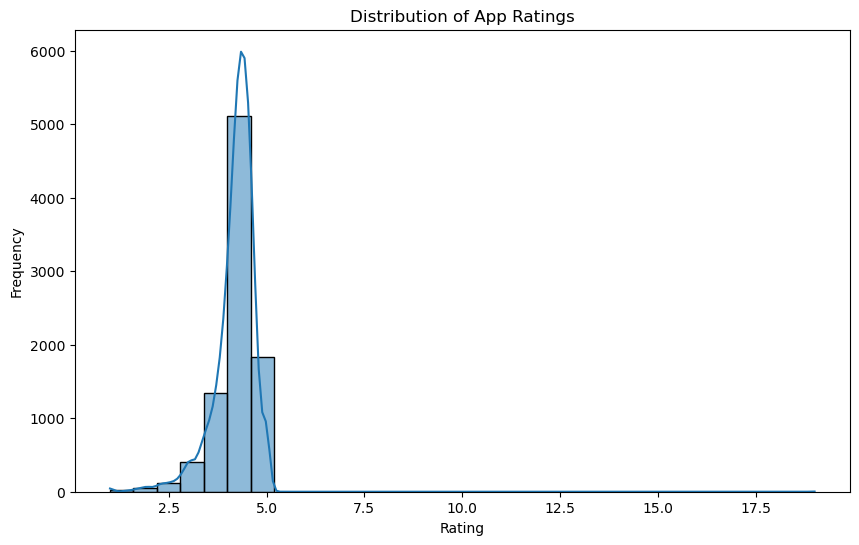

In [12]:
#Visualization
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'], bins=30, kde=True)
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

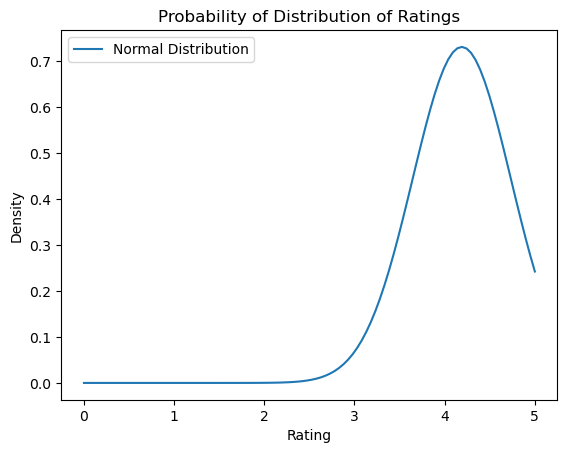

In [13]:
#Probability of Distributions
x = np.linspace(0,5,100)
plt.plot(x,
         norm.pdf(x,mean_rating, std_dev_rating),
         label='Normal Distribution')
plt.title("Probability of Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.legend()
plt.show()

In [15]:
#Probability of an app having Rating > 4.5
prob_high_rating = len(df[df['Rating'] >4.5]) /len(df)
print(f"Probability of an App having Rating > 4.5: {prob_high_rating:.2f}")

Probability of an App having Rating > 4.5: 0.21


In [16]:
#Bayes' Theorem
num_education_high_rating = len(df[(df['Category'] == 'EDUCATION') & (df['Rating'] > 4.5)])
num_high_rating = len(df[df['Rating'] > 4.5])
prob_education_high_rating = num_education_high_rating / num_high_rating
print(f"P(Category = 'Education' | Rating > 4.5) : {prob_education_high_rating:.2f}")

P(Category = 'Education' | Rating > 4.5) : 0.02
